# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from time import sleep

# Import API key
from api_keys import api_key
from pprint import pprint

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #city_name = city.city_name
    #country_code = city.country_code
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        #cities.append(country_code)

# Print the city count to confirm sufficient count
len(cities)

612

In [43]:
type(cities)

cities[0:5]

['kenai', 'luderitz', 'cascais', 'hobart', 'paradwip']

In [15]:
#base_url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = base_url + "appid=" + api_key + "&q=" + city_name
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

#pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': -19.06, 'lon': -169.92},
 'dt': 1547326800,
 'id': 4036284,
 'main': {'humidity': 69,
          'pressure': 1008,
          'temp': 301.15,
          'temp_max': 301.15,
          'temp_min': 301.15},
 'name': 'Alofi',
 'sys': {'country': 'NU',
         'id': 7306,
         'message': 0.0034,
         'sunrise': 1547311995,
         'sunset': 1547359404,
         'type': 1},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 5.1}}


In [44]:
#Perform API Calls
city_exists = []
cloudiness = []
country_code = []
date = []
windspeed = []
#temperature = []
humidity = []
max_temp = []
lat = []
lon = []

# Get weather data
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Get the temperature from the response
#pprint (weather_json)

#test_cities = cities[0:20]
#for city_name in test_cities:
#for counter, city_name in enumerate(test_cities, 1): 
for counter, city_name in enumerate(cities, 1): 
    print (f"{counter} for {city_name}")
    query_url = base_url + "appid=" + api_key + "&q=" + city_name
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    if (weather_json['cod'] != "404"):
        city_exists.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country_code.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        windspeed.append(weather_json['wind']['speed'])
        #temperature.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        max_temp.append(weather_json['main']['temp_max'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
    else:
        print("City not found.")
    sleep(1.1)   
        
#print(city_exists)
#print(cloudiness)
#print(country_code)
#print(date)
#print(windspeed)
#print(humidity)
#print(max_temp)
#print(lat)
#print(lon)


1 for kenai
2 for luderitz
3 for cascais
4 for hobart
5 for paradwip
City not found.
6 for porto walter
7 for puerto baquerizo moreno
8 for busselton
9 for esperance
10 for saskylakh
11 for dasoguz
12 for barentsburg
City not found.
13 for rikitea
14 for ushuaia
15 for aksarka
16 for cape town
17 for christchurch
18 for karratha
19 for saulkrasti
20 for chokurdakh
21 for cabedelo
22 for georgetown
23 for buri
24 for villazon
City not found.
25 for nha trang
26 for avarua
27 for tuktoyaktuk
28 for bambous virieux
29 for port alfred
30 for atuona
31 for pitimbu
32 for mataura
33 for arraial do cabo
34 for tiksi
35 for ust-tsilma
36 for great yarmouth
37 for los llanos de aridane
38 for oxbow
39 for bluff
40 for fortuna
41 for saint george
42 for garowe
43 for limbang
44 for hithadhoo
45 for taolanaro
City not found.
46 for zhigansk
47 for pueblo nuevo
48 for kahului
49 for ngunguru
50 for voh
51 for kayes
52 for binga
53 for whyalla
54 for waipawa
55 for barrow
56 for nikolskoye
57 for a

In [92]:
city_exists

['Margate',
 'Hermanus',
 'Bilma',
 'Chokurdakh',
 'Yellowknife',
 'Punta Arenas',
 'San Carlos de Bariloche',
 'Kisangani',
 'Coquimbo',
 'Tasiilaq',
 'Saronno',
 'Qaqortoq',
 'Staryy Nadym',
 'Vaini',
 'Saskylakh',
 'Buraydah',
 'Ilulissat',
 'Broome',
 'Carlagan',
 'Faanui',
 'Assiniboia',
 'East London',
 'Tuatapere',
 'Bambous Virieux',
 'Fortuna',
 'Khatanga',
 'Derzhavinsk',
 'Saint-Philippe',
 'Bredasdorp',
 'Nipawin']

In [ ]:
#query_url = base_url + "appid=" + api_key + "&q=trash"
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()    
#pprint(weather_json)    

In [45]:
#create a dataframe to store all the cities and countries generated with citipy
weatherpy_df = pd.DataFrame({'City':city_exists, 'Cloudiness':cloudiness, 'Country':country_code, 
                              'Date': date, 'Humidity':humidity, 'Latitude':lat, 'Longitude':lon,
                             'Max Temp':max_temp, 'Wind Speed': windspeed})
#print(city_exists)
#print(cloudiness)
#print(country_code)
#print(date)
#print(humidity)
#print(lat)
#print(lon)
#print(max_temp)
#print(windspeed)

weatherpy_df


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Kenai,40,US,1547420160,81,60.55,-151.26,272.550,4.60
1,Luderitz,0,NA,1547424213,86,-26.65,15.16,290.030,6.63
2,Cascais,0,PT,1547420400,70,38.70,-9.42,282.150,2.10
3,Hobart,0,AU,1547422200,46,-42.88,147.33,295.150,4.60
4,Porto Walter,20,BR,1547424110,83,-8.27,-72.74,299.130,0.48
5,Puerto Baquerizo Moreno,90,EC,1547420400,94,-0.90,-89.60,297.150,3.60
6,Busselton,0,AU,1547424221,100,-33.64,115.35,290.180,7.78
7,Esperance,20,TT,1547420400,73,10.24,-61.45,298.150,2.10
8,Saskylakh,0,RU,1547424224,0,71.97,114.09,224.080,3.68
9,Dasoguz,0,TM,1547420400,80,41.84,59.97,272.150,3.10


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
weatherpy_df.to_csv(output_data_file, encoding="utf-8", index=False)

In [47]:
weatherpy_df.to_csv(output_data_file, encoding="utf-8", index=False)

In [48]:
#create a dataframe to store all the cities and countries generated with citipy
weatherpy_df = pd.DataFrame({'City':city_exists, 'Cloudiness':cloudiness, 'Country':country_code, 
                              'Date': date, 'Humidity':humidity, 'Latitude':lat, 'Longitude':lon,
                             'Max Temp':max_temp, 'Wind Speed': windspeed})
#print(city_exists)
#print(cloudiness)
#print(country_code)
#print(date)
#print(humidity)
#print(lat)
#print(lon)
#print(max_temp)
#print(windspeed)

weatherpy_df.head()


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Kenai,40,US,1547420160,81,60.55,-151.26,272.55,4.60
1,Luderitz,0,NA,1547424213,86,-26.65,15.16,290.03,6.63
2,Cascais,0,PT,1547420400,70,38.70,-9.42,282.15,2.10
3,Hobart,0,AU,1547422200,46,-42.88,147.33,295.15,4.60
4,Porto Walter,20,BR,1547424110,83,-8.27,-72.74,299.13,0.48


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

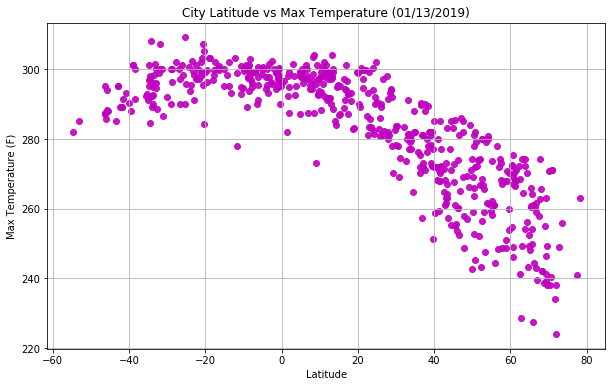

In [49]:
# Plotting the Data - Latitude vs. Temperature Plot
plt.figure(figsize=(10,6))
plt.scatter(weatherpy_df["Latitude"], weatherpy_df["Max Temp"], color='m', alpha=0.9)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature (01/13/2019)')
plt.savefig("./output/latvtemp.png")
plt.show()

#### Latitude vs. Humidity Plot

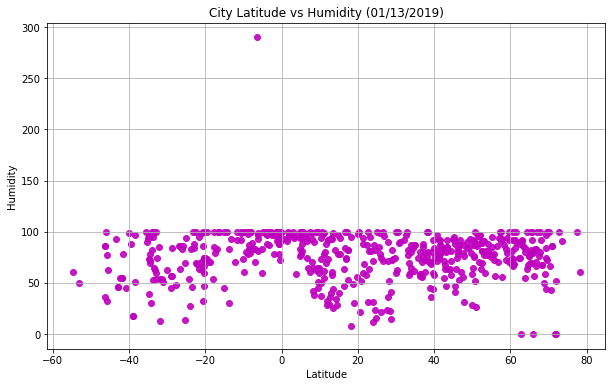

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(weatherpy_df["Latitude"], weatherpy_df["Humidity"], color='m', alpha=0.9)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'City Latitude vs Humidity (01/13/2019)')
plt.savefig("./output/latvhumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

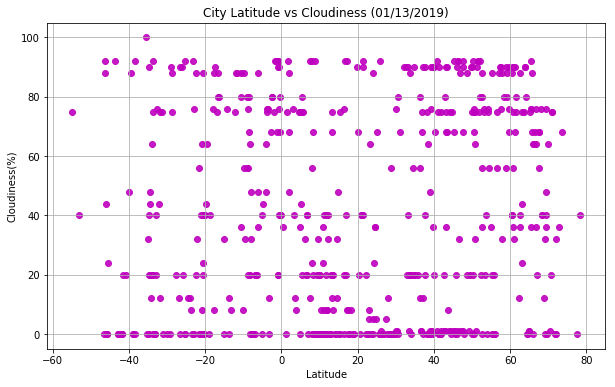

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(weatherpy_df["Latitude"], weatherpy_df["Cloudiness"], color='m', alpha=0.9)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f'City Latitude vs Cloudiness (01/13/2019)')
plt.savefig("./output/latvclouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

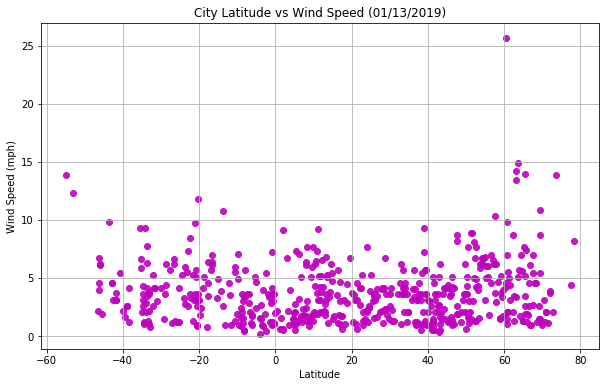

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(weatherpy_df["Latitude"], weatherpy_df["Wind Speed"], color='m', alpha=0.9)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed (01/13/2019)')
plt.savefig("./output/latvwind.png")
plt.show()